<a href="https://colab.research.google.com/github/mion158/data-mining-assignments/blob/main/PCA_norm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_matrix = pd.read_csv('https://raw.githubusercontent.com/mion158/data-mining-assignments/main/Principal%20component%20analysis/data_matrix.csv')
classes = pd.read_csv('https://raw.githubusercontent.com/mion158/data-mining-assignments/main/Principal%20component%20analysis/classes.csv', index_col=0)['class']

In [3]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [4]:
# Find the principal components
pca = PCA()
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')

Number of features in the data matrix: 11
Number of features in the principal components: 11


In [5]:
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

In [6]:
# Eigenvectors are in the property `.components_` as row vectors. To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_.T


In [7]:
# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

In [9]:
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 
 
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)

In [10]:
# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 11


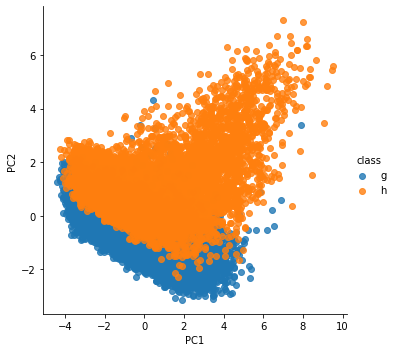

In [11]:
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

In [12]:
# Use the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes

In [13]:
# Get principal components with 2 features 
# Perform PCA using 2 components
pca_1 = PCA(n_components=2) 
 
# Use the principal components as X and split the data into 33% testing and the rest training
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')


Score for model with 2 PCA features: 0.8649036163772503


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [15]:
# Using the original features 
# Select two features from the original data
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]
 
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

In [16]:
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 randomly selected features: {score_2}')

Score for model with 2 randomly selected features: 0.9993627529074398
